# 1. Cropper를 활용한 이미지 전처리
### Cropper의 필수 패키지 호출

In [1]:
import os
import random
import dlib
import matplotlib.pyplot as plt
from PIL import Image 
import glob 
from autocrop import Cropper 

plt.rc('font', family='NanumGothic') # Korean Font

### 대회의 데이터를 형식에 맞게 추출
#### 약 64만개의 real data를 glob을 사용하여 호출 

In [2]:
real_paths=glob.glob('D:/dacon/deepfake_1st/real/*/*/*/*/*.jpg')

#### Cropper의 경우 사진에서 얼굴을 인식하지 못하면 NoneType을 배출하기 때문에 이를 방지하기 위하여
#### 사전에 None을 배출하는 사진을 지정해준다.

In [3]:
cropper = Cropper()
cropped_array = cropper.crop(real_paths[0])
print(type(cropped_array))

<class 'NoneType'>


### 모든 파일을 순서대로 Cropper하여 이미지로 저장

In [4]:
b=type(cropped_array)
for z in range(len(real_paths)):
    cropper = Cropper()
    cropped_array = cropper.crop(real_paths[z])
    if type(cropped_array)!=b:
        cropped_image = Image.fromarray(cropped_array)
        cropped_array = cropped_image.resize((300, 300))
        k= str(z)+'.jpg'
        cropped_array.save(k)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


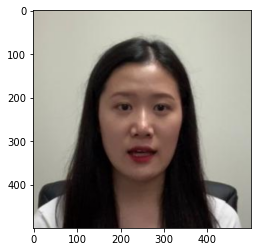

In [5]:
plt.imshow(cropped_image)

### Fake 데이터 처리
#### 위와 마찬가지로 fake 데이터를 호출하고 cropper를 사용하여 저장

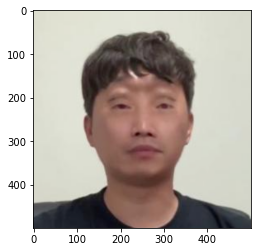

In [6]:
fake_paths=glob.glob('D:/dacon/deepfake_1st/fake/*/*/*/*/*.jpg')
cropper = Cropper()
cropped_array = cropper.crop(fake_paths[0])
b=type(cropped_array)
for z in range(len(fake_paths)):
    cropper = Cropper()
    cropped_array = cropper.crop(fake_paths[z])
    if type(cropped_array)!=b:
        cropped_image = Image.fromarray(cropped_array)
        cropped_array = cropped_image.resize((300, 300))
        k= str(z)+'.jpg'
        cropped_array.save(k)
plt.imshow(cropped_image)

# 2. MTCNN을 활용한 이미지 전처리

### MTCNN의 경우 GPU를 활용하여 이미지를 처리하기 때문에 호출해주어야한다.

In [7]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


### MTCNN의 필수 패키지 호출

In [8]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from mtcnn import MTCNN 

### Cropper와 마찬가지로 glob을 활용하여 데이터 호출

In [9]:
real_paths=glob.glob('D:/dacon/deepfake_1st/real/*/*/*/*/*.jpg')
fake_paths=glob.glob('D:/dacon/deepfake_1st/fake/*/*/*/*/*.jpg')

### MTCNN을 활용하여 데이터 처리 모델 제작

In [10]:
def make_crop_img(image_file, detector):
    result = detector.detect_faces(image_file)
    if result == []:
        print('No information')
        return []
    else:
        bounding_box = result[0]['box']
        resizeImageNDArray = image_file.copy()
        resizeImageNDArray = image_file[bounding_box[1]:bounding_box[1]+bounding_box[3], bounding_box[0]:bounding_box[0]+bounding_box[2]]
        resizeImageNDArray = cv2.resize(resizeImageNDArray, (300, 300), interpolation = cv2.INTER_CUBIC)
        return resizeImageNDArray

### real 이미지 처리 수행

No information
error information in 1


C:\Users\user\anaconda3\envs\data_env_tensorflow2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


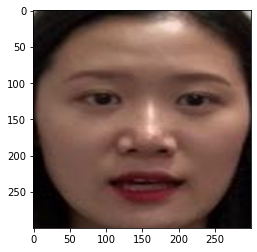

In [11]:
m = 0
detector = MTCNN()
for i in real_paths:
    m += 1
    images = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB) # i => 각각의 이미지 파일 경로
    images = make_crop_img(images, detector)
    
    if images == []:
        print('error information in {}'.format(m)) # 이미지 결측치는 크롭 안 하고 넘어감
    else:
        k= str(m)+'.jpg'
        cv2.imwrite( k, cv2.cvtColor(images, cv2.COLOR_RGB2BGR))
        if m % 100 == 0:
            print(m, ' complete') # 크롭이 잘 진행되는지 확인하기 위해 100단위로 출력
        
plt.imshow(images)

### fake 이미지 처리 수행

No information
error information in 1


C:\Users\user\anaconda3\envs\data_env_tensorflow2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


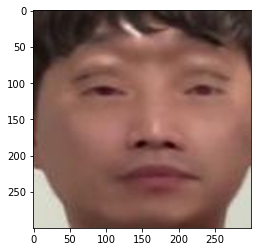

In [12]:
m = 0
detector = MTCNN()
for i in fake_paths:
    m += 1
    images = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB) # i => 각각의 이미지 파일 경로
    images = make_crop_img(images, detector)
    
    if images == []:
        print('error information in {}'.format(m)) # 이미지 결측치는 크롭 안 하고 넘어감
    else:
        k= str(m)+'.jpg'
        cv2.imwrite( k, cv2.cvtColor(images, cv2.COLOR_RGB2BGR))
        if m % 100 == 0:
            print(m, ' complete') # 크롭이 잘 진행되는지 확인하기 위해 100단위로 출력
        
plt.imshow(images)

# 3. 1D Average Spectrum을 활용한 이미지 1차원특징벡터 추출

In [ ]:
path = ['D:/dacon/deepfake_1st/real/*/*/*/*/*.jpg/','D:/dacon/deepfake_1st/fake/*/*/*/*/*/*.jpg']
labels = [0, 1]
format_file = ['jpg','jpg']
epsilon = 1e-8
data = {}

#number of samples from each dataset
stop = 30000
number_iter = 2 * stop
psd1D_total = np.zeros([number_iter, 210])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(2):
    cont = 0
    prs1D_anverage_org = np.zeros(210)
    print(path[z])
    
    for filename in glob.glob(path[z] + "/*." + format_file[z]):
        img = cv2.imread(filename, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon
        
        magnitude_spectrum = 20 * np.log(np.abs(fshift))
        
        psd1D = azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_, :] = psd1D
        label_total[iter_] = labels[z]
        
        cont += 1
        iter_ += 1
        if cont % 100 == 0:
            print(cont)
        if cont >= stop:
            break
            
data["data"] = psd1D_total
data["label"] = label_total  


output = open('dataset_freq_30000.pkl','wb')
pickle.dump(data, output)
output.close()
print("DATA Saved")



## 1D Average Spectrum Plot

In [ ]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

# Error Level Analysis를 활용한 이미지 특징추출

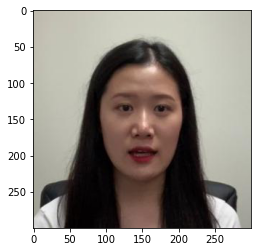

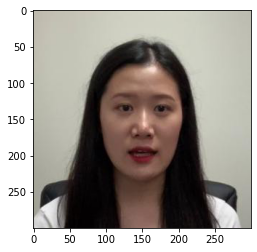

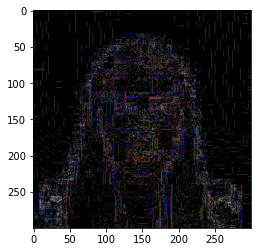

In [25]:
import os
import sys

from PIL import Image
from PIL import ImageChops
from PIL import ImageEnhance 


from matplotlib import pyplot as plt
import matplotlib.image as mpimg

resaved = 'resaved.jpg'
ela = 'ela.jpg'

img_path = 'path'
# img = mpimg.imread(img_path)
# plt.imshow(img)


im = Image.open(img_path)
im.save(resaved, 'JPEG', quality = 90)

resaved_im = Image.open(resaved)
ela_im = ImageChops.difference(im, resaved_im)
extrema = ela_im.getextrema()


max_diff = max([ex[1] for ex in extrema])

scale = 255.0/max_diff

ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)

ela_im.save(ela)
    

plt.figure()
plt.imshow(im)
plt.figure()
plt.imshow(resaved_im)
plt.figure()
plt.imshow(ela_im)